In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


In [40]:
df = pd.read_csv('german_credit_data.csv')
print("Shape:", df.shape)
df.head()


Shape: (1000, 11)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [41]:
df = df.drop('Unnamed: 0', axis=1, errors='ignore').dropna().reset_index(drop=True)
print("Clean shape:", df.shape) 
df['Risk'].value_counts(normalize=True)*100


Clean shape: (522, 10)


Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

In [42]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,522.0,NaN,NaN,NaN,34.888889,11.787918,19.0,26.0,31.5,41.0,75.0
Sex,522,2,male,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,522.0,NaN,NaN,NaN,1.875479,0.682811,0.0,2.0,2.0,2.0,3.0
Housing,522,3,own,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,522,4,little,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,522,3,little,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,522.0,NaN,NaN,NaN,3278.745211,2929.155177,276.0,1297.5,2326.5,3971.25,18424.0
Duration,522.0,NaN,NaN,NaN,21.33908,12.474079,6.0,12.0,18.0,26.75,72.0
Purpose,522,8,car,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk,522,2,good,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN


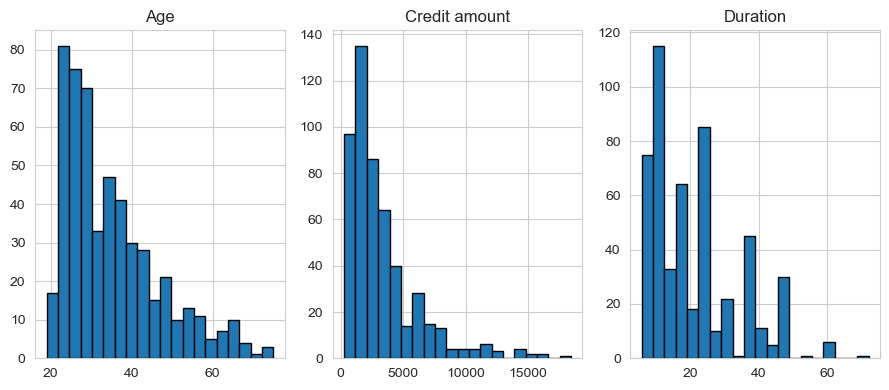

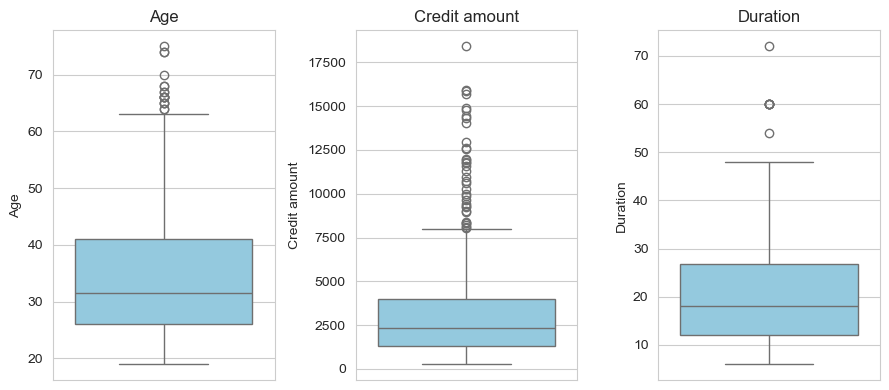

In [43]:
numerical = ['Age', 'Credit amount', 'Duration']
plt.figure(figsize=(9,4))
for i, col in enumerate(numerical,1):
    plt.subplot(1,3,i)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
for i, col in enumerate(numerical):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()



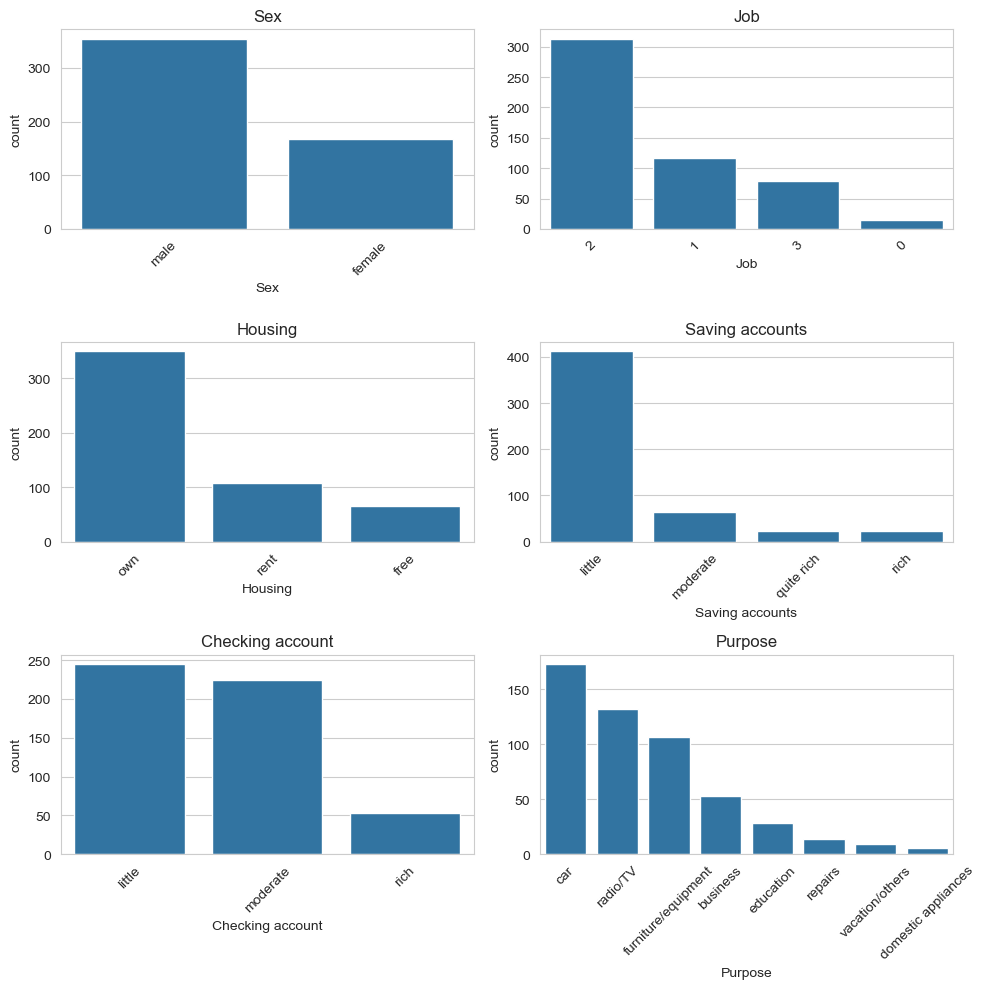

In [44]:
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical):
    plt.subplot(3,2,i+1)
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.title(f'{col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


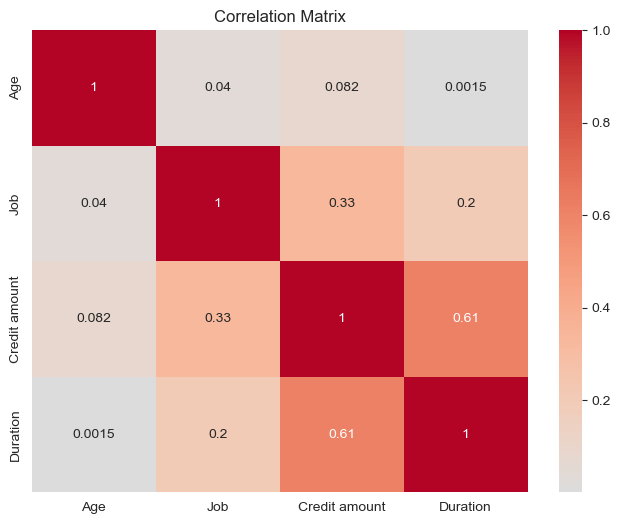

Credit by Job:
 Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

Credit by Sex:
 Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64


In [45]:
corr_cols = ['Age','Job','Credit amount','Duration']
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

print("Credit by Job:\n", df.groupby('Job')['Credit amount'].mean())
print("\nCredit by Sex:\n", df.groupby('Sex')['Credit amount'].mean())



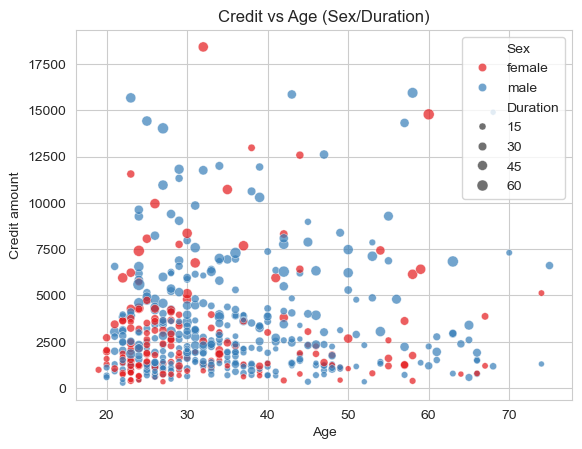

C:\Users\singh\AppData\Local\Temp\ipykernel_16916\1385902189.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Saving accounts', y='Credit amount', palette='pastel')


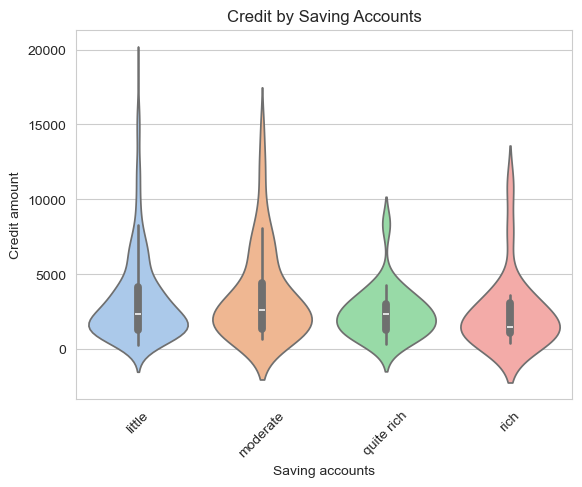

In [46]:
sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Sex', size='Duration', 
                alpha=0.7, palette='Set1')
plt.title('Credit vs Age (Sex/Duration)')
plt.show()

sns.violinplot(data=df, x='Saving accounts', y='Credit amount', palette='pastel')
plt.title('Credit by Saving Accounts')
plt.xticks(rotation=45)
plt.show()


C:\Users\singh\AppData\Local\Temp\ipykernel_16916\4072138535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk', y=col, palette='pastel')
C:\Users\singh\AppData\Local\Temp\ipykernel_16916\4072138535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk', y=col, palette='pastel')
C:\Users\singh\AppData\Local\Temp\ipykernel_16916\4072138535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk', y=col, palette='pastel')


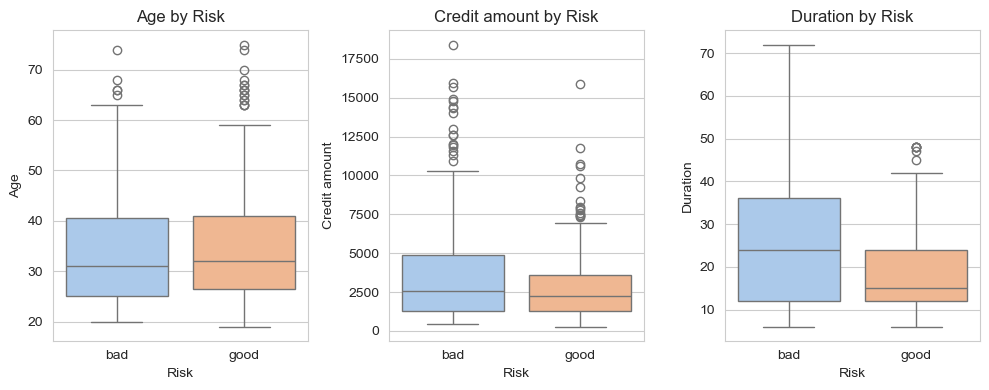

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [47]:
plt.figure(figsize=(10,4))
for i, col in enumerate(numerical):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df, x='Risk', y=col, palette='pastel')
    plt.title(f'{col} by Risk')
plt.tight_layout()
plt.show()

df.groupby('Risk')[numerical].mean()



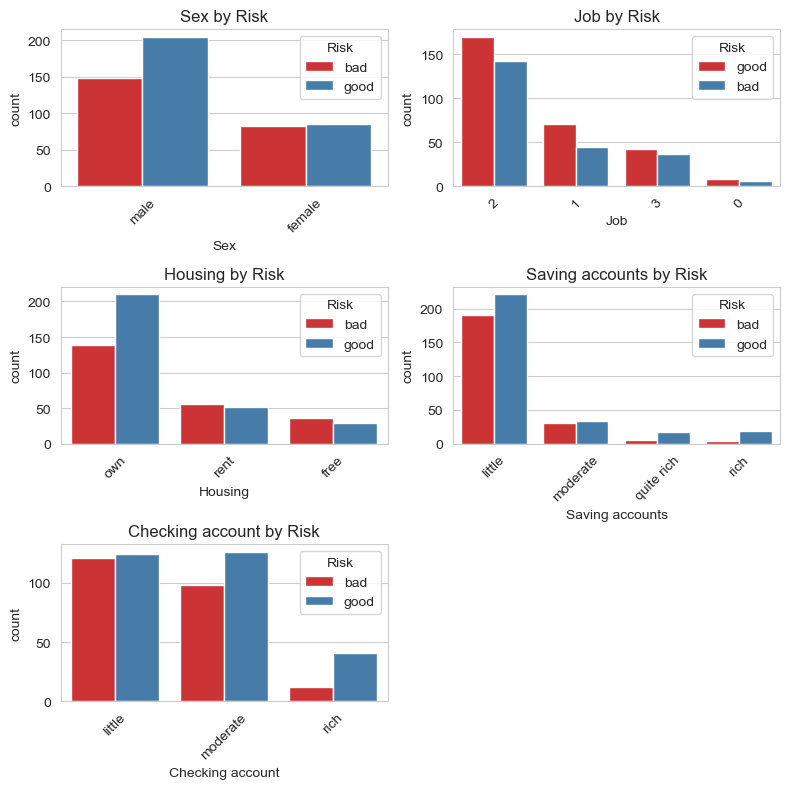

In [48]:
plt.figure(figsize=(8,8))
for i, col in enumerate(categorical[:-1]):
    plt.subplot(3,2,i+1)
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, hue='Risk', order=order, palette='Set1')
    plt.title(f'{col} by Risk')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
features = ['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration']
target = 'Risk'
df_model = df[features + [target]].copy()
df_model.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [50]:
from sklearn.preprocessing import LabelEncoder
import joblib

cat_cols = ['Sex','Job','Housing','Saving accounts','Checking account']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    joblib.dump(le, f'{col.replace(" ","_")}_encoder.pkl')


In [51]:
le_target = LabelEncoder()
df_model[target] = le_target.fit_transform(df_model[target])
joblib.dump(le_target, 'target_encoder.pkl')
print("Target encoding: 1=good(low risk), 0=bad(high risk)")
df_model[target].value_counts()


Target encoding: 1=good(low risk), 0=bad(high risk)


Risk
1    291
0    231
Name: count, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X = df_model.drop(target, axis=1)
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=1)
print("X_train:", X_train.shape, "X_test:", X_test.shape)


X_train: (417, 8) X_test: (105, 8)


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best = grid.best_estimator_
    y_pred = best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best, acc, grid.best_params_

dt = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_params = {'max_depth':[3,5,7,10,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
best_dt, dt_acc, dt_best = train_model(dt, dt_params, X_train, y_train, X_test, y_test)
print(f"DT: {dt_acc:.3f}")
print("Params:", dt_best)

rf = RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
rf_params = {'n_estimators':[100,200],'max_depth':[5,7,10,None],
             'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
best_rf, rf_acc, rf_best = train_model(rf, rf_params, X_train, y_train, X_test, y_test)
print(f"RF: {rf_acc:.3f}")
print("Params:", rf_best)

et = ExtraTreesClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
best_et, et_acc, et_best = train_model(et, rf_params, X_train, y_train, X_test, y_test)
print(f"ET: {et_acc:.3f}")  # 0.666 VIDEO EXACT
print("Params:", et_best)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(random_state=1, scale_pos_weight=scale_pos_weight, eval_metric='logloss')
xgb_params = {'n_estimators':[100,200], 'max_depth':[3,5,7]}
best_xgb, xgb_acc, xgb_best = train_model(xgb, xgb_params, X_train, y_train, X_test, y_test)
print(f"XGB: {xgb_acc:.3f}")


DT: 0.581
Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
RF: 0.619
Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
ET: 0.648
Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
XGB: 0.648


In [54]:
import joblib
joblib.dump(best_et, 'best_credit_risk_model.pkl')
print(" SAVED")


 SAVED


In [55]:
# CELL 28: Install Streamlit (Run this)
import sys
!{sys.executable} -m pip install streamlit pandas scikit-learn xgboost joblib matplotlib seaborn
print("Streamlit installed!")


Defaulting to user installation because normal site-packages is not writeable
Streamlit installed!


In [56]:
# ========================================
# CELL 29: STREAMLIT APP.PY
# ========================================

app_code = '''
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# FIX: set_page_config FIRST (line 6)
st.set_page_config(page_title="Credit Risk", layout="wide")

@st.cache_resource
def load_models():
    model = joblib.load('best_credit_risk_model.pkl')
    encoders = {
        'Sex': joblib.load('Sex_encoder.pkl'),
        'Job': joblib.load('Job_encoder.pkl'),
        'Housing': joblib.load('Housing_encoder.pkl'),
        'Saving accounts': joblib.load('Saving_accounts_encoder.pkl'),
        'Checking account': joblib.load('Checking_account_encoder.pkl')
    }
    target_encoder = joblib.load('target_encoder.pkl')
    return model, encoders, target_encoder

model, encoders, target_encoder = load_models()

st.title("Credit Risk Predictor")

# Sidebar
st.sidebar.header("Applicant Details")
age = st.sidebar.slider("Age", 19, 75, 35)
credit_amount = st.sidebar.slider("Credit Amount (€)", 250, 18424, 4000)
duration = st.sidebar.slider("Duration (months)", 4, 72, 18)

sex = st.sidebar.selectbox("Sex", encoders['Sex'].classes_)
job = st.sidebar.selectbox("Job", encoders['Job'].classes_)
housing = st.sidebar.selectbox("Housing", encoders['Housing'].classes_)
saving_accounts = st.sidebar.selectbox("Saving accounts", encoders['Saving accounts'].classes_)
checking_account = st.sidebar.selectbox("Checking account", encoders['Checking account'].classes_)

if st.sidebar.button("PREDICT RISK", type="primary"):
    input_data = {
        'Age': age,
        'Sex': encoders['Sex'].transform([sex])[0],
        'Job': encoders['Job'].transform([job])[0],
        'Housing': encoders['Housing'].transform([housing])[0],
        'Saving accounts': encoders['Saving accounts'].transform([saving_accounts])[0],
        'Checking account': encoders['Checking account'].transform([checking_account])[0],
        'Credit amount': credit_amount,
        'Duration': duration
    }
    
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)[0]
    probabilities = model.predict_proba(input_df)[0]
    
    risk = target_encoder.inverse_transform([prediction])[0]
    
    col1, col2, col3 = st.columns(3)
    col1.metric("Risk Level", risk)
    col2.metric("Low Risk %", f"{probabilities[1]*100:.1f}%")
    col3.metric("High Risk %", f"{probabilities[0]*100:.1f}%")
    
    if risk == 'good':
        st.success("APPROVE - Low Risk!")
        st.markdown(" **CREDIT APPROVED** ")
    else:
        st.error(" **REJECT** - High Risk!")
        st.markdown("**HIGH RISK** ")
        st.markdown("### **Review required** ")
    
    st.subheader("Input Summary")
    summary_df = input_df.copy()
    summary_df['Sex'] = sex
    summary_df['Job'] = job
    summary_df['Housing'] = housing
    summary_df['Saving accounts'] = saving_accounts
    summary_df['Checking account'] = checking_account
    summary_df['Predicted'] = risk
    st.dataframe(summary_df)

st.markdown("---")
'''

# OVERWRITE app.py with FIXED version
with open('app.py', 'w') as f:
    f.write(app_code)



In [57]:
# CELL 30: LAUNCH APP
import subprocess
import webbrowser
import time

proc = subprocess.Popen(['streamlit', 'run', 'app.py', '--server.headless=true', '--server.port=8501'])
time.sleep(4)
webbrowser.open('http://localhost:8501')



True